In [1]:
runNumber = 302393

fname = "/eos/user/c/cmstandi/PURunIIFiles/R{0}/wsfile.root".format( runNumber)
import ROOT
f = ROOT.TFile.Open( fname )

Welcome to JupyROOT 6.24/00


In [2]:
f.ls()

TFile**		/eos/user/c/cmstandi/PURunIIFiles/R302393/wsfile.root	
 TFile*		/eos/user/c/cmstandi/PURunIIFiles/R302393/wsfile.root	
  KEY: RooWorkspace	w;1	w
  KEY: TProcessID	ProcessID0;1	803273ac-0b75-11ec-a0c8-873c8e80beef
  KEY: RooDataSet	DSR302393;1	


In [3]:
ds = f.Get("DSR{0}".format(runNumber))
ds.Print()

RooDataSet::DSR302393[run,lumi,bx,orbit,nGoodVertices,nVertices,nEles,nMus,nChargedHadrons,nLostTracks,nPhotons,nNeutralHadrons,fixedGridRhoAll,fixedGridRhoFastjetAll,fixedGridRhoFastjetAllCalo,fixedGridRhoFastjetCentral,fixedGridRhoFastjetCentralCalo,fixedGridRhoFastjetCentralChargedPileUp,fixedGridRhoFastjetCentralNeutral,PHYSICSDel,PHYSICSRec,hfocDel,hfocRec,bcm1fDel,bcm1fRec,pltzeroDel,pltzeroRec,pccDel,pccRec] = 2027789 entries


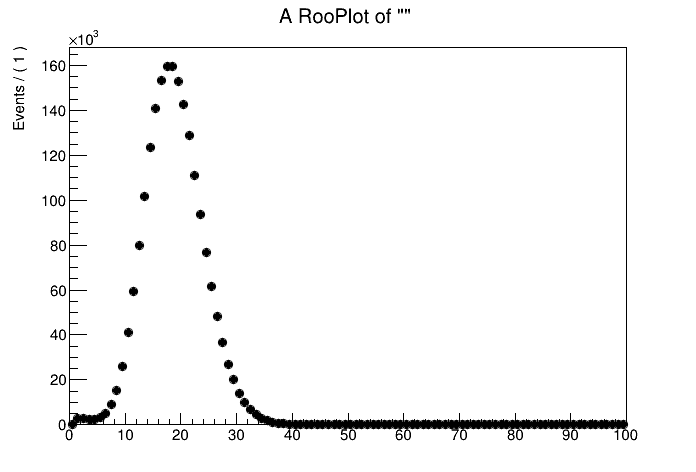

In [4]:
var = ROOT.RooRealVar("nGoodVertices" , "" , 0 , 100)
frame=var.frame()
ds.plotOn(frame)
c=ROOT.TCanvas()
frame.Draw()
c.Draw()

In [7]:
import math

def convert_size(size_bytes):
   if size_bytes == 0:
       return "0B"
   size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
   i = int(math.floor(math.log(size_bytes, 1024)))
   p = math.pow(1024, i)
   s = round(size_bytes / p, 2)
   return "%s %s" % (s, size_name[i])
import os, psutil
process = psutil.Process(os.getpid())
print(convert_size( process.memory_info().rss ) )  # in bytes 


698.21 MB


In [1]:
import matplotlib.pyplot as plt

In [3]:
df = px.data.iris()

In [4]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145      

In [6]:
type(df)

pandas.core.frame.DataFrame

In [17]:
data_fit1 = {'lumi':[1,2,3,4] , 'xsection':[10,15,30,25] , 'status':['0','0','4','0'] , 'error':[2,2,3,1]}
data_fit2 = {'lumi':[1,2,3,4] , 'xsection':[11,14,31,29] , 'status':['0','4','4','0'] , 'error':[1,2,3,1]}
allfits = [data_fit1 , data_fit2]
data = {a:[y for x in allfits for y in x[a] ] for a in data_fit1}
data['fit'] = [ 'fit{0}'.format( allfits.index(x)) for x in allfits for y in x ]
fig = px.scatter(data, x="lumi", y="xsection", symbol="fit" , error_y="error" , color='status' )
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [12]:
data

{'lumi': [1, 2, 3, 4, 1, 2, 3, 4],
 'xsection': [10, 15, 30, 25, 11, 14, 31, 29],
 'status': [0, 0, 4, 0, 0, 4, 4, 0],
 'error': [2, 2, 3, 1, 1, 2, 3, 1],
 'fit': [0, 0, 0, 0, 1, 1, 1, 1]}